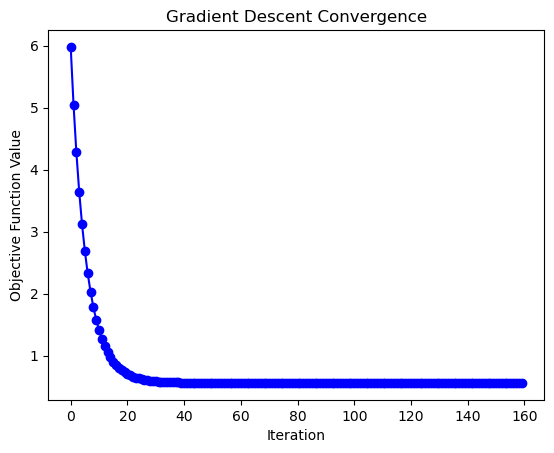

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent(X, y, eta, tol, epsilon, tau, max_iter=1000, backtracking=True):
    n, p = X.shape
    beta = np.zeros(p)
    obj_values = []
    
    def obj_function(beta):
        return np.sum((X @ beta - y) ** 2) / (2 * n)
    
    def gradient(beta):
        return X.T @ (X @ beta - y) / n
    
    for _ in range(max_iter):
        grad = gradient(beta)
        
        if backtracking:
            t = 1  # Initial step size
            beta_new = beta - t * grad
            
            while obj_function(beta_new) > obj_function(beta) - epsilon * t * np.sum(grad ** 2):
                t *= tau
                beta_new = beta - t * grad
        else:
            beta_new = beta - eta * grad
        
        obj_values.append(obj_function(beta_new))
        
        if np.linalg.norm(beta_new - beta) < tol:
            break
        
        beta = beta_new
    
    return beta, obj_values

# Example usage
np.random.seed(42)
X = np.random.randn(100, 2)  # 100 samples, 2 features
y = X @ np.array([2, -3]) + np.random.randn(100)  # True coefficients (2, -3) with noise

# User-specified parameters
eta = 0.1
tol = 1e-6
epsilon = 0.5
tau = 0.8

beta, obj_values = gradient_descent(X, y, eta, tol, epsilon, tau, backtracking=False)

# Plot objective function values over iterations
plt.plot(obj_values, marker='o', linestyle='-', color='blue')
plt.xlabel("Iteration")
plt.ylabel("Objective Function Value")
plt.title("Gradient Descent Convergence")
plt.show()
